In [22]:
import numpy as np 
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

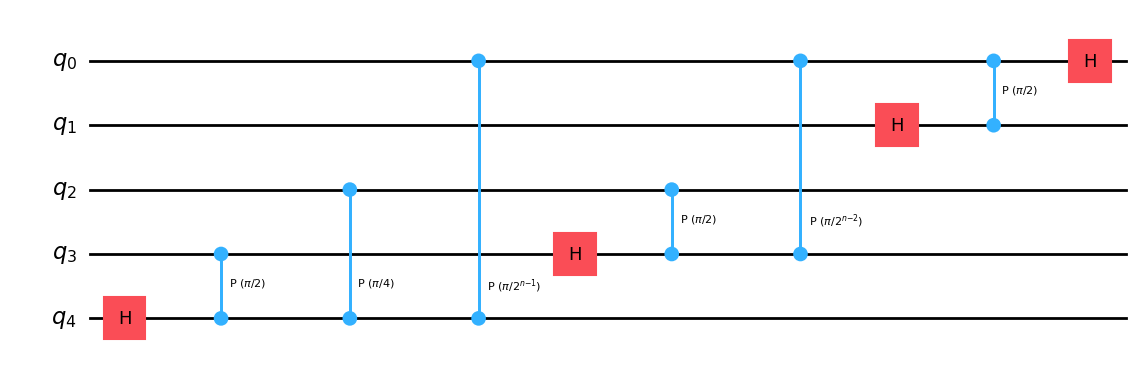

In [23]:
qc = QuantumCircuit(5)
qc.h(4)
qc.cp( np.pi/2, 3, 4 )
qc.cp( np.pi/4, 2, 4 )
phi = Parameter(r"$\pi/2^{n\minus 1}$")
qc.cp( phi, 0, 4 )

qc.barrier()
qc.h(3)
qc.cp( np.pi/2, 2, 3 )
phi = Parameter(r"$\pi/2^{n\minus 2}$")
qc.cp( phi, 0, 3 )

qc.barrier()
qc.h(1)
qc.cp( np.pi/2, 0, 1 )

qc.barrier()
qc.h(0)

qc.draw('mpl', plot_barriers=False, filename='QFT.svg' )

In [24]:
def u_to_n( n ):
    u = QuantumCircuit(1)
    u.unitary(np.eye(2),0 )
    if isinstance(n, int):
        u = u.to_gate(label=r'$U^{}$'.format(n) )
    else:
        u = u.to_gate(label=n)
    return u 

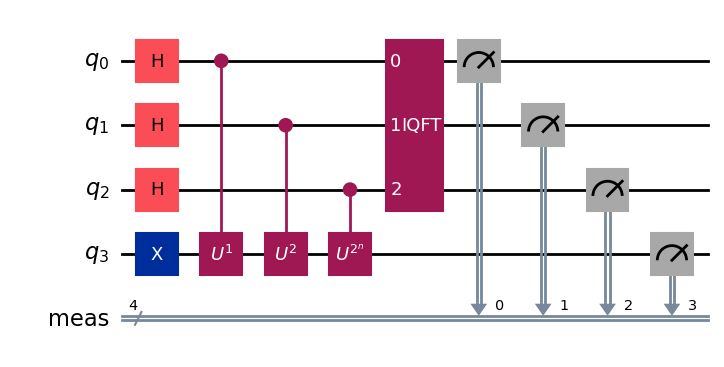

In [31]:
qc = QuantumCircuit(4)

qc.h(range(3))
qc.x(3)
qc.append( u_to_n( 1 ).control(1), [0,3] )
qc.append( u_to_n( 2 ).control(1), [1,3] )
qc.append( u_to_n( r'$U^{2^n}$' ).control(1), [2,3] )

qc.unitary( np.eye(8), [0,1,2], label='IQFT' )

qc.measure_all()

qc.draw('mpl', plot_barriers=False, filename='QPE.svg' )